In [1]:
from scipy.io import arff
from copy import copy

import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
#Importation d'un axe 3D

from sklearn.cluster import AgglomerativeClustering
import time
import scipy.cluster.hierarchy as sch

from sklearn.cluster import DBSCAN

import hdbscan

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [72]:
from datetime import datetime

Les algorithmes utilisés et leur utilité:

L'algorithme KMeans et HierarchicalClustering fonctionnent bien pour des DataSet convexes.

KMeans choisit aléatoirement le nombre de points passés en paramètres dans le jeu de données
KMeans++ choisit d'abord le premier cluster et le prochain sera celui qui a la plus grande distance


dbscan et hdbscan pour données densite variable - Trouver score homogeneite et completude
dbscan spheriq: Un fixe e et le nombre min de points pour que tout pt qui a dans un rayon e(en fonction d'une prévisualisation et fixer e en fonction des distances moyennes entre les points, ie l'échelle des données) un minimum de min points
autour de lui soit considéré comme un cluster - fixer min à au moins 3 sinon chaque pt sera considéré comme un cluster

hdbscan (dbscan optauto) - Les parAmètres sont définis lors de l'initialisation

<h1>Lecture et visualisation des datasets</h1>

In [46]:
data1 = arff.loadarff(open("atom.arff","r"))
#data2 = arff.loadarff(open("cuboids.arff","r"))
data2 = arff.loadarff(open("cassini.arff","r"))
data3 = arff.loadarff(open("banana.arff","r"))
data4 = arff.loadarff(open('2d-4c-no9.arff','r'))

In [47]:
data1=pandas.DataFrame(data1[0])
data1

x          y          z class
0    -4.822490 -50.402170   4.020861  b'1'
1   -44.460120  20.964670 -11.492060  b'1'
2    50.001020   0.780748   9.134460  b'1'
3   -41.699080 -22.310060  16.314120  b'1'
4     4.425242  -4.666664  50.223740  b'1'
..         ...        ...        ...   ...
795  -1.531027   0.681636   0.543271  b'2'
796   0.500754  -1.848209   0.605654  b'2'
797   1.089574  -0.246493  -3.355758  b'2'
798  -1.907717   4.964502   2.098423  b'2'
799   3.415463   4.529521  -1.617736  b'2'

[800 rows x 4 columns]

In [48]:
data1['class'].unique()

array([b'1', b'2'], dtype=object)

             x          y          z
0    -4.822490 -50.402170   4.020861
1   -44.460120  20.964670 -11.492060
2    50.001020   0.780748   9.134460
3   -41.699080 -22.310060  16.314120
4     4.425242  -4.666664  50.223740
..         ...        ...        ...
795  -1.531027   0.681636   0.543271
796   0.500754  -1.848209   0.605654
797   1.089574  -0.246493  -3.355758
798  -1.907717   4.964502   2.098423
799   3.415463   4.529521  -1.617736

[800 rows x 3 columns]


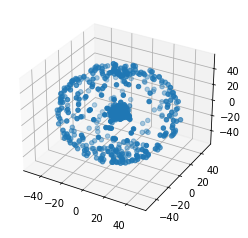

In [49]:
data1['class']=data1['class'].replace(data1['class'].unique(),[i for i in range(1,len(data1['class'].unique())+1)])

#On va créer une copie du dataset sans la colonne class
data1_withclass=copy(data1)
data1=data1.drop('class',axis=1)

print(data1)


axes=plt.axes(projection='3d')  # On cree un objet axe, puisqu'on est obligé la POO pour les graphes 3d
axes.scatter(data1.x , data1.y, data1.z)
plt.show()

In [50]:
data1_withclass

x          y          z  class
0    -4.822490 -50.402170   4.020861      1
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      1
4     4.425242  -4.666664  50.223740      1
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      2
796   0.500754  -1.848209   0.605654      2
797   1.089574  -0.246493  -3.355758      2
798  -1.907717   4.964502   2.098423      2
799   3.415463   4.529521  -1.617736      2

[800 rows x 4 columns]

In [53]:
data2=pandas.DataFrame(data2[0])

            x         y
0   -1.076347 -1.104321
1    0.304475 -1.102593
2    1.005627 -1.075503
3    0.462763 -1.277198
4    0.539408 -1.228040
..        ...       ...
995 -0.533666  0.047843
996 -0.089081  0.054118
997  0.257830 -0.049803
998  0.077537 -0.212516
999 -0.032551 -0.284334

[1000 rows x 2 columns]


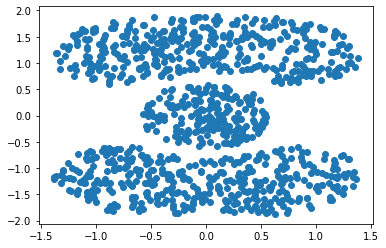

In [54]:
data2['class']=data2['class'].replace(data2['class'].unique(),[i for i in range(1,len(data2['class'].unique())+1)])

#On va créer une copie du dataset sans la colonne class
data2_withclass=copy(data2)
data2=data2.drop('class',axis=1)

print(data2)

plt.scatter(data2['x'], data2['y'])
plt.show()

In [55]:
data3=pandas.DataFrame(data3[0])

          x      y
0     0.228  0.559
1     0.216  0.528
2     0.221  0.552
3     0.215  0.538
4     0.224  0.548
...     ...    ...
4806  0.507  0.269
4807  0.526  0.237
4808  0.513  0.233
4809  0.506  0.221
4810  0.515  0.260

[4811 rows x 2 columns]


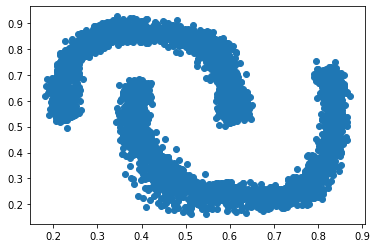

In [56]:
data3['class']=data3['class'].replace(data3['class'].unique(),[i for i in range(1,len(data3['class'].unique())+1)])

#On va créer une copie du dataset sans la colonne class
data3_withclass=copy(data3)
data3=data3.drop('class',axis=1)
print(data3)

plt.scatter(data3['x'], data3['y'])
plt.show()

In [78]:
data4 = arff.loadarff(open('2d-4c-no9.arff','r'))

In [79]:
data4=pandas.DataFrame(data4[0])

In [80]:
data4

a0        a1 class
0   -9.33717 -1.479760  b'0'
1   -4.46281 -0.157614  b'0'
2   -5.48281 -1.338230  b'0'
3   -9.82805 -0.335942  b'0'
4   -3.98464  0.756735  b'0'
..       ...       ...   ...
871 -9.41189 -7.142230  b'3'
872 -9.21620 -7.325990  b'3'
873 -9.22509 -7.471830  b'3'
874 -9.37243 -7.362970  b'3'
875 -9.17332 -7.153290  b'3'

[876 rows x 3 columns]

In [81]:
data4.rename(columns={'a0': 'x', 'a1': 'y'}, inplace=True)

           x         y
0   -9.33717 -1.479760
1   -4.46281 -0.157614
2   -5.48281 -1.338230
3   -9.82805 -0.335942
4   -3.98464  0.756735
..       ...       ...
871 -9.41189 -7.142230
872 -9.21620 -7.325990
873 -9.22509 -7.471830
874 -9.37243 -7.362970
875 -9.17332 -7.153290

[876 rows x 2 columns]


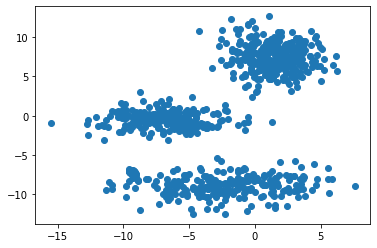

In [82]:
data4['class']=data4['class'].replace(data4['class'].unique(),[i for i in range(1,len(data4['class'].unique())+1)])

#On va créer une copie du dataset sans la colonne class
data4_withclass=copy(data4)
data4=data4.drop('class',axis=1)

print(data4)

plt.scatter(data4['x'], data4['y'])
plt.show()

<h1>Definition de fonction et packages utiles</h1>

In [13]:
def egalite_listes(label1,classes1):
    justesse1=0
    for i in range(len(label1)):
        if(label1[i]==classes1[i]):
            justesse1+=1
    return justesse1

<h1>K-Means Clustering</h1>

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents. Il n'est pas adapte egalement aux donnees anisotropes,ou encore non convexes. Il existe plusieurs metriques telles que la methode Elbow tres connue ou encore la methode Silhouette permettant d'apprecier la pertinence des clusters obtenus quoique en fonction des objectifs d'utilisation,les resultats de ces metriques peuvent etre ignores.

<h3>Premier Dataset</h3>

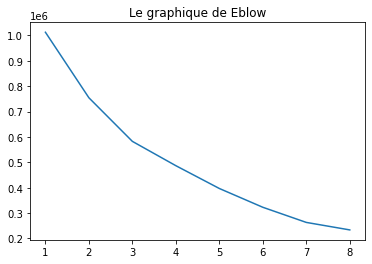

In [14]:
tab=[]

for i in range(1,9,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data1)
    tab.append(kmeans.inertia_)

axe0=numpy.arange(1,9,1)
plt.plot(axe0,tab)
plt.title("Le graphique de Eblow")
plt.show()

In [58]:
model = KMeans(n_clusters=3)
#model = KMeans()

debut_temps = time.perf_counter()

model.fit(data1)
fin_temps = time.perf_counter()

print(fin_temps - debut_temps)

0.23262079999994967


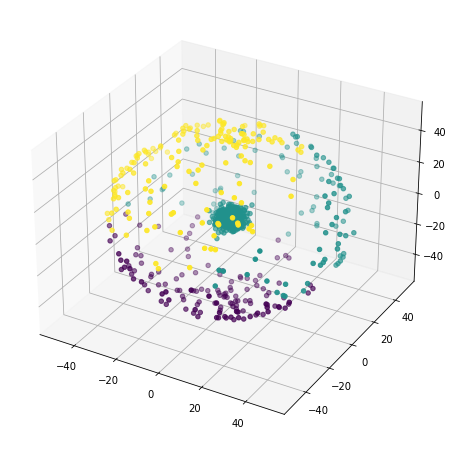

In [59]:
plt.figure(figsize=(15,8))
axes=plt.axes(projection='3d')  # On cree un objet axe, puisqu'on est obligé la POO pour les graphes 3d
axes.scatter(data1.x , data1.y, data1.z,c=model.labels_.astype(float))
plt.show()

<h3>Deuxieme Dataset</h3>

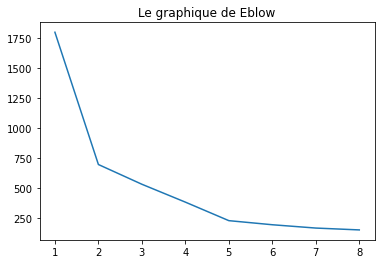

In [18]:
tab=[]

for i in range(1,9,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data2)
    tab.append(kmeans.inertia_)

axe0=numpy.arange(1,9,1)
plt.plot(axe0,tab)
plt.title("Le graphique de Eblow")
plt.show()

In [19]:
data2_withclass['class']

0      1
1      1
2      1
3      1
4      1
      ..
995    3
996    3
997    3
998    3
999    3
Name: class, Length: 1000, dtype: int64

In [60]:
debut_temps = time.perf_counter()

model1 = KMeans()
model1.fit(data2)

fin_temps = time.perf_counter()

t1=fin_temps - debut_temps


debut_temps2 = time.perf_counter()

model2 = KMeans(n_clusters=2)
model2.fit(data2)

fin_temps2 = time.perf_counter()

t2=fin_temps - debut_temps

plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.scatter(data2.x , data2.y, c=model1.labels_.astype(float))
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], c='r')
plt.title("Fait auto en: "+ str(t1))

plt.subplot(2,2,2)
plt.scatter(data2.x , data2.y, c=model2.labels_.astype(float))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], c='r')
plt.title("Cluster fixé à 3 en: "+ str(t2))

plt.subplot(2,2,3)
plt.scatter(data2_withclass.x , data2_withclass.y, c=data2_withclass['class'].astype(float))
plt.title("Vrais clusters")

plt.show()

<h3>Troisième Dataset</h3>

In [21]:
tab=[]

for i in range(1,9,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data3)
    tab.append(kmeans.inertia_)

axe0=numpy.arange(1,9,1)
plt.plot(axe0,tab)
plt.title("Le graphique de Eblow")
plt.show()

In [22]:
debut_temps = time.perf_counter()

model1 = KMeans()
model1.fit(data3)

fin_temps = time.perf_counter()
t1=fin_temps - debut_temps

debut_temps = time.perf_counter()

model2 = KMeans(n_clusters=2)
model2.fit(data3)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps

plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.scatter(data3.x , data3.y, c=model1.labels_.astype(float))
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], c='r')
plt.title("Fait auto en: "+ str(t1))

plt.subplot(2,2,2)
plt.scatter(data3.x , data3.y, c=model2.labels_.astype(float))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], c='r')
plt.title("Cluster fixé à 2 en: "+ str(t2))

plt.subplot(2,2,3)
plt.scatter(data3_withclass.x , data3_withclass.y, c=data3_withclass['class'].astype(float))
plt.title("Vrais clusters")


plt.show()

<h3>Quatrième Dataset</h3>

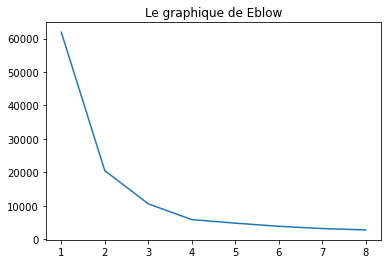

In [23]:
tab=[]

for i in range(1,9,1):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data4)
    tab.append(kmeans.inertia_)

axe0=numpy.arange(1,9,1)
plt.plot(axe0,tab)
plt.title("Le graphique de Eblow")
plt.show()

In [24]:
debut_temps = time.perf_counter()

model1 = KMeans() 
model1.fit(data4)

fin_temps = time.perf_counter()
t1=fin_temps - debut_temps

debut_temps = time.perf_counter()

model2 = KMeans(n_clusters=3)
model2.fit(data4)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps

plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.scatter(data4.x , data4.y, c=model1.labels_.astype(float))
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1], c='r')
plt.title("Fait auto en: "+str(t1))

plt.subplot(2,2,2)
plt.scatter(data4.x , data4.y, c=model2.labels_.astype(float))
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], c='r')
plt.title("Cluster fixé à 3 en: "+str(t2))

plt.subplot(2,2,3)
plt.scatter(data4_withclass.x , data4_withclass.y, c=data4_withclass['class'].astype(float))
plt.title("Vrais clusters")

plt.show()

<u>Conclusion:</u> D'abord on remarque que quand on laisse KMeans choisir lui mm les clusters, non seulement ça prend du temps, mais aussi le nombre de clusters choisi n'est as forcément optimal. Raison pour laquelle le plupart du temps, il faut préciser les hyperparamètre qui sont ici nb_clusters. <hr>
On remarque en général que K-Means ne marche pas bien pour les jeux de données qui sont globulaires ou sphériques
<hr>
Ce choix est par contre très difficile à déterminer.

<h1>Clustering Agglomératif</h1>

Le clustering agglomératif est une stratégie d'analyse de cluster hiérarchique. Cet algorithme de clustering ne nous oblige pas à pré-spécifier le nombre de clusters.

Les algorithmes ascendants traitent chaque donnée comme un cluster singleton au départ, puis agglomèrent successivement des paires de clusters jusqu’à ce que tous les clusters aient été fusionnés en un seul cluster contenant toutes les données. Cette stratégie d'analyse fait appel à différentes méthodes Ward, Complete, Single et Average.

<h3>Premier Dataset</h3>

In [112]:
debut_temps = time.perf_counter()

model_1agglo=AgglomerativeClustering(n_clusters=2)
model_1agglo.fit(data1)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps


plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(data1['x'], data1['y'], data1['z'], c=model_1agglo.labels_.astype(float))
#Trois dimensions
plt.title(""+str(t2))

plt.subplot(1,2,2)
#Deux dimensions
plt.scatter(data1['x'], data1['y'], c=model_1agglo.labels_.astype(float))
plt.title(""+str(t2))

plt.show()

C:\Users\mx\miniconda3\envs\mainconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


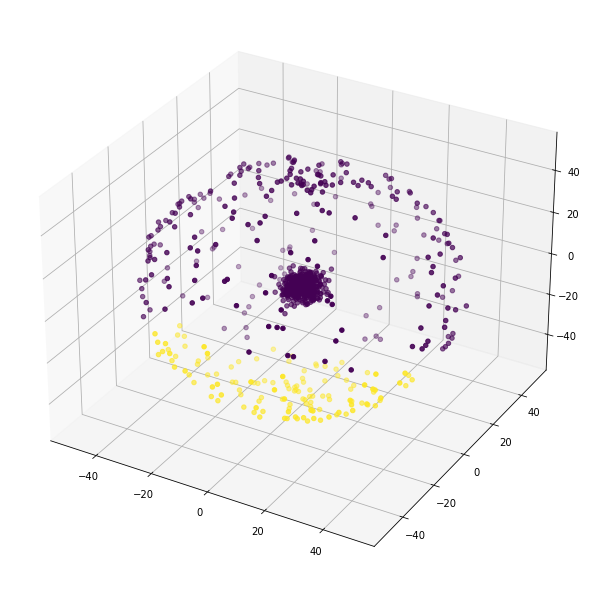

In [26]:
fig = plt.figure(figsize=(15,8))
axes = Axes3D(fig, auto_add_to_figure=False)
#axes = fig.add_axes([0, 0, 1, 1])
fig.add_axes(axes)
axes.scatter(data1.x , data1.y, data1.z,c=model_1agglo.labels_.astype(float))
plt.show()

<h3>Deuxième Dataset</h3>

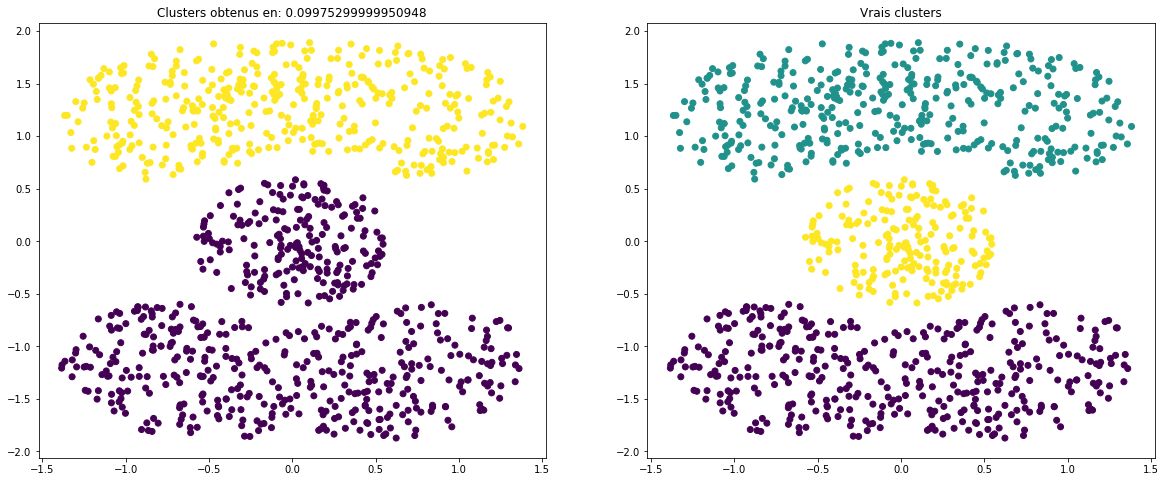

In [114]:
#model_2agglo=AgglomerativeClustering(n_clusters=3)

debut_temps = time.perf_counter()

model_2agglo=AgglomerativeClustering()
model_2agglo.fit(data2)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(data2['x'], data2['y'], c=model_2agglo.labels_.astype(float))
plt.title("Clusters obtenus en: "+str(t2))

plt.subplot(1,2,2)
plt.scatter(data2_withclass.x , data2_withclass.y, c=data2_withclass['class'].astype(float))
plt.title("Vrais clusters")

plt.show()

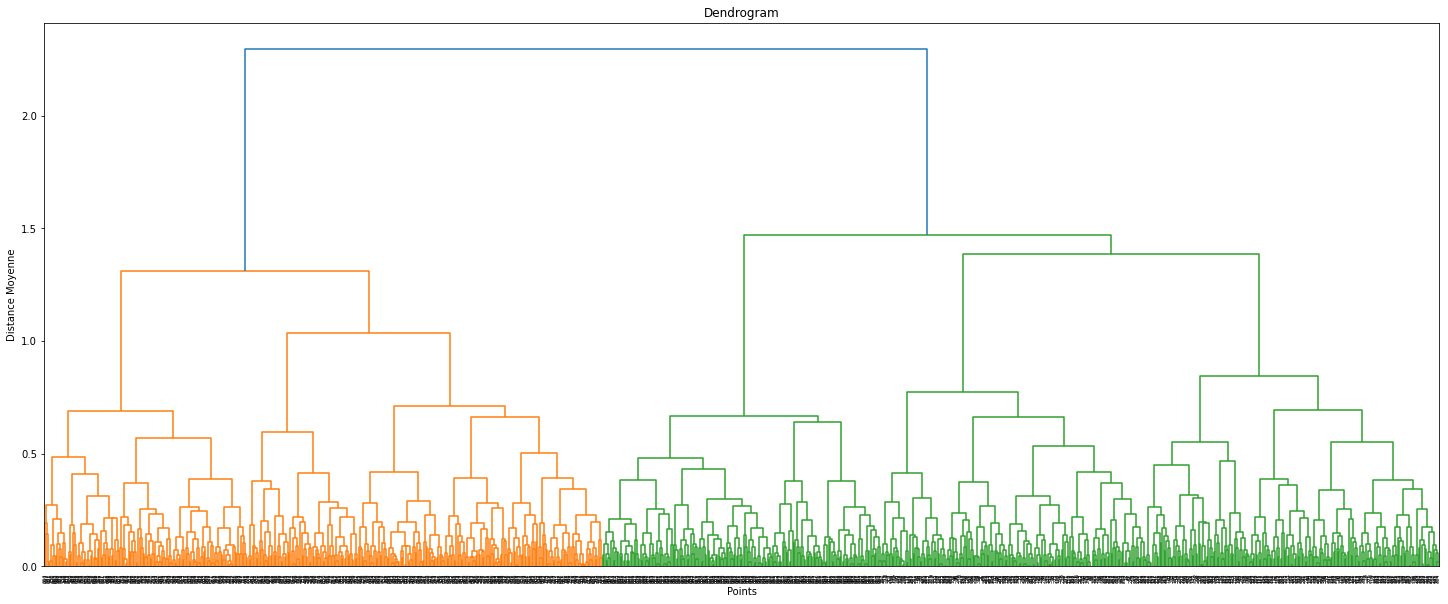

In [73]:
start_time=datetime.now()

agglomeratif_cluster=linkage(data2,method="average",metric="euclidean")

end_time = datetime.now()
temps_execution=end_time-start_time
plt.figure(figsize=(25, 10))
d=dendrogram(agglomeratif_cluster)
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance Moyenne')
plt.show()

In [ ]:
temps_execution

In [28]:
# Comparaison entre les méthodes
methodes = ['ward', 'complete', 'average', 'single']
j, k = 0, 0
fig, axes = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
for i in methodes:
    if(k == 2):
        j, k = 1, 0
    start = time.time()
    dendrogram = sch.dendrogram(sch.linkage(data2, method=i),ax=axes[j, k], orientation='top')
    end   = time.time()
    axes[j, k].set_title(f'méthode: {i}, temps = {"%.2f" % (end-start)}')
    k = k+1

Pour ce dataset, la méthode complète est la plus optimale, mais les temps de calcul sont très proches

<h3>Troisième Dataset</h3>

In [115]:
debut_temps = time.perf_counter()

model_3agglo=AgglomerativeClustering(n_clusters=2)
model_3agglo.fit(data3)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(data3['x'], data3['y'], c=model_3agglo.labels_.astype(float))
plt.title("Clusters obtenus en: "+str(t2))

plt.subplot(1,2,2)
plt.scatter(data3_withclass.x , data3_withclass.y, c=data3_withclass['class'].astype(float))
plt.title("Vrais clusters")

plt.show()

<h3>Quatrième Dataset</h3>

In [116]:
debut_temps = time.perf_counter()

model_4agglo=AgglomerativeClustering(n_clusters=3)
model_4agglo.fit(data4)

fin_temps = time.perf_counter()
t2=fin_temps - debut_temps

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(data4['x'], data4['y'], c=model_4agglo.labels_.astype(float))
plt.title("Clusters obtenus en: "+str(t2))

plt.subplot(1,2,2)
#plt.scatter(data4['x'], data4['y'], c=model_4agglo.labels_.astype(float))
plt.scatter(data4_withclass.x , data4_withclass.y, c=data4_withclass['class'].astype(float))
plt.title("Vrais clusters")

plt.show()

<u>Conclusion:</u> Sur le clustering agglomeratif:Si les variables sont énormes, alors K-Means est la plupart du temps plus rapide en calcul que le clustering hiérarchique, si nous gardons k petits,Les K-Means produisent des clusters plus serrés que le clustering hiérarchique, surtout si les clusters sont globulaires.

Le regroupement hiérarchique est pratique, mais peut facilement résulter sur des Dendrogrammes totalement erronés. Pour cause, l’algorithme de clustering s’exécutera même sur des données totalement inadaptées.

Une autre raison est que la méthode de création de clusters choisie peut générer des Dendrogrammes très différents. Il est très important de choisir la bonne méthode, mais ce n’est pas toujours évident.

La seule façon d’éviter à coup sûr ce désagrément est de connaître précisément toutes les données du dataset. Dans le cas du Big Data, c’est quasiment impossible.

<hr>
K-Means et Hierarchical Clustering échouent tous deux à créer des clusters de formes arbitraires. Ils ne sont pas capables de former des clusters basés sur des densités variables. C'est pourquoi nous avons besoin du clustering DBSCAN.

<h1>Clustering DBSCAN</h1>

DBSCAN ne requiert que deux paramètres : epsilon et minPoints. Epsilon est le rayon du cercle à créer autour de chaque point de données pour vérifier la densité et minPoints est le nombre minimum de points de données requis à l'intérieur de ce cercle pour que ce point de données soit classé comme point central.

<h3>Premier Dataset</h3>

In [31]:
model_1dbscan = DBSCAN(eps=3, min_samples=10)
model_1dbscan.fit(data1)

plt.scatter(data1['x'], data1['y'],data1['z'], c=model_1dbscan.labels_, cmap='rainbow')

C:\Users\mx\miniconda3\envs\mainconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


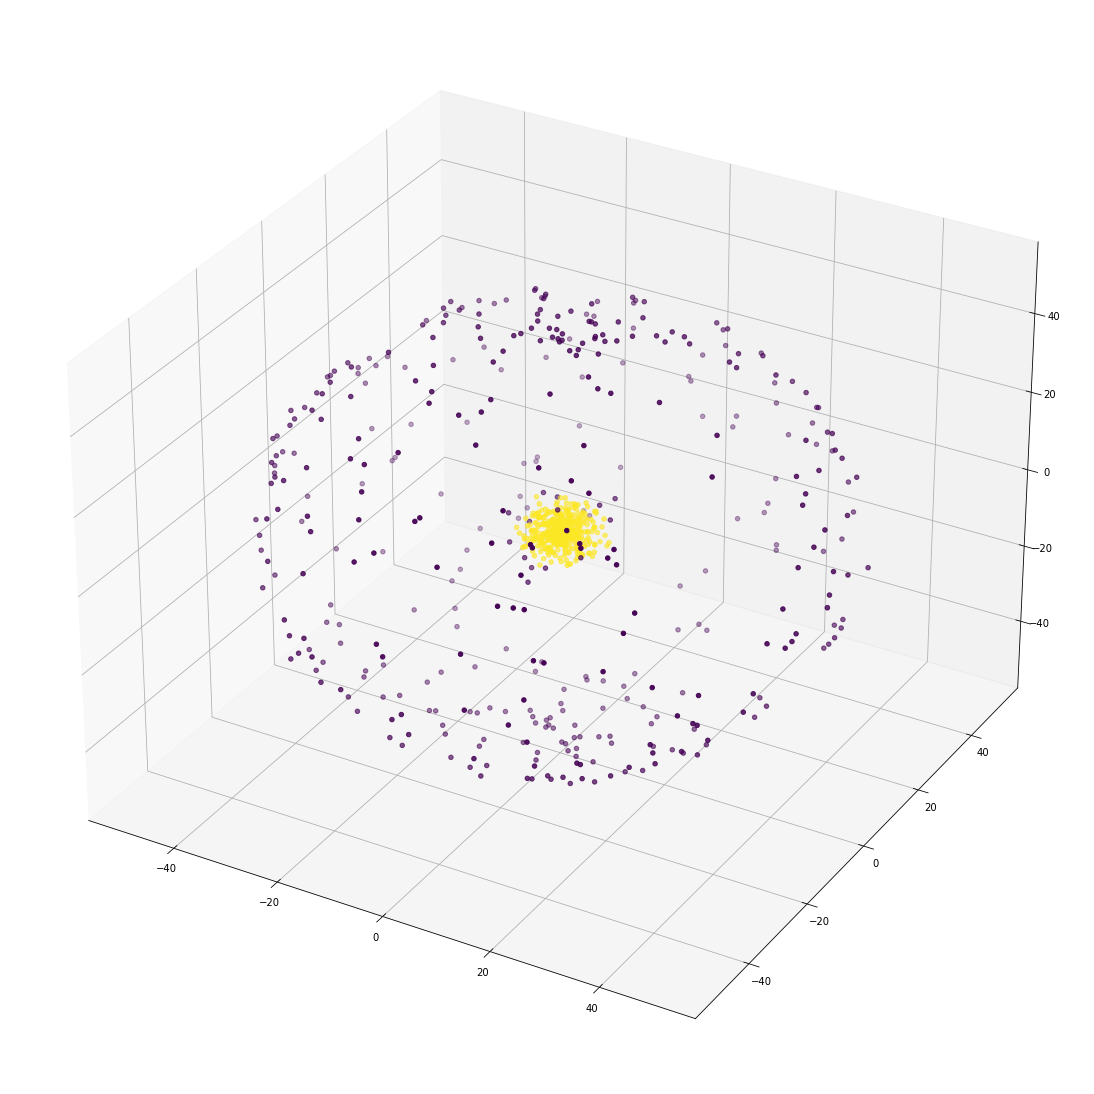

In [32]:
#axes=plt.axes(projection='3d')  # On cree un objet axe, puisqu'on est obligé la POO pour les graphes 3d
#axes.scatter(data1.x , data1.y, data1.z,c=model_1dbscan.labels_)

fig = plt.figure(figsize=(15,15))
axes = Axes3D(fig, auto_add_to_figure=False)
#axes = fig.add_axes([0, 0, 1, 1])
fig.add_axes(axes)
axes.scatter(data1.x , data1.y, data1.z,c=model_1dbscan.labels_)
plt.show()

<h3>Deuxieme Dataset</h3>

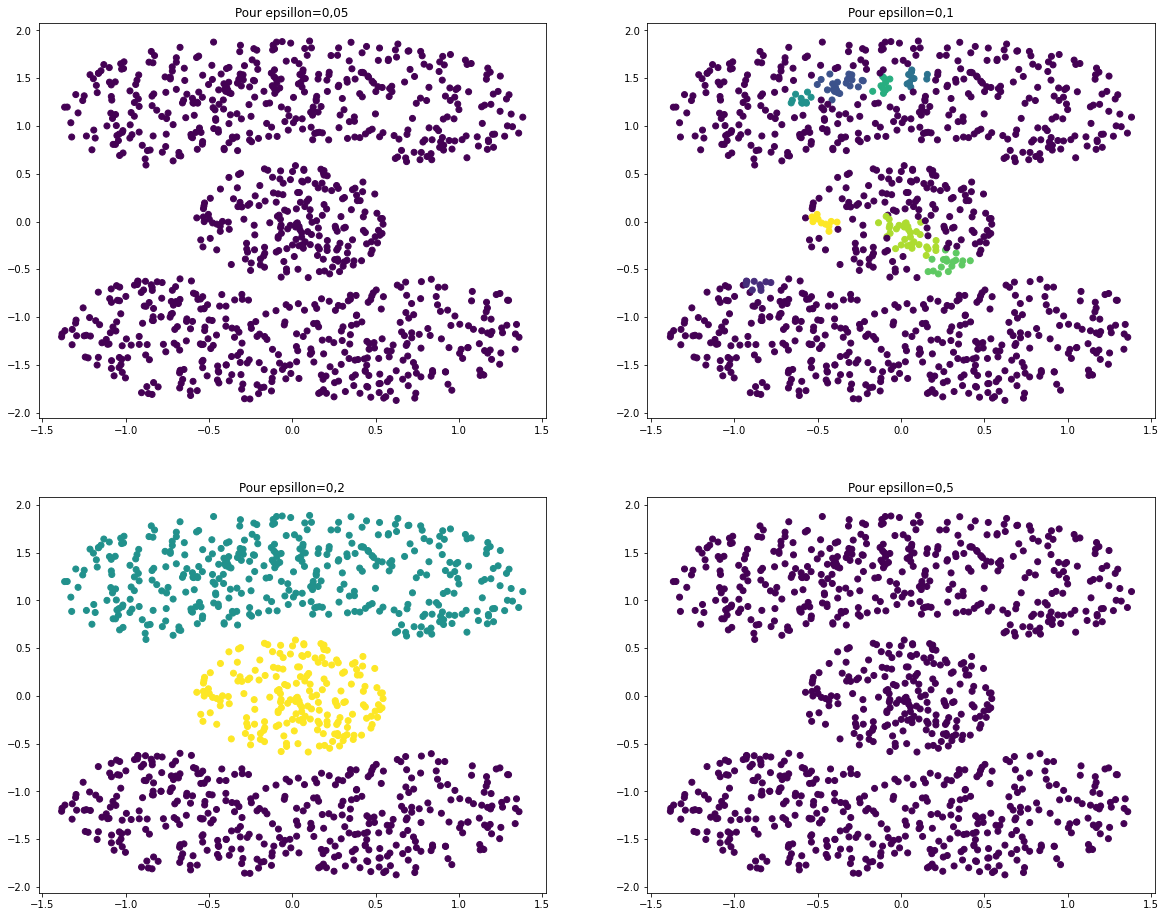

In [99]:
model_2dbscan1= DBSCAN(eps=0.05, min_samples=10)
model_2dbscan1.fit(data2)

model_2dbscan2= DBSCAN(eps=0.1, min_samples=10)
model_2dbscan2.fit(data2)

model_2dbscan3= DBSCAN(eps=0.2, min_samples=10)
model_2dbscan3.fit(data2)

model_2dbscan4= DBSCAN(eps=0.5, min_samples=10)
model_2dbscan4.fit(data2)

plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
plt.scatter(data2['x'], data2['y'], c=model_2dbscan1.labels_.astype(float))
plt.title("Pour epsillon=0,05")

plt.subplot(2,2,2)
plt.scatter(data2['x'], data2['y'], c=model_2dbscan2.labels_.astype(float))
plt.title("Pour epsillon=0,1")

plt.subplot(2,2,3)
plt.scatter(data2['x'], data2['y'], c=model_2dbscan3.labels_.astype(float))
plt.title("Pour epsillon=0,2")

plt.subplot(2,2,4)
plt.scatter(data2['x'], data2['y'], c=model_2dbscan4.labels_.astype(float))
plt.title("Pour epsillon=0,5")

plt.show()

<h3>Troisième Dataset</h3>

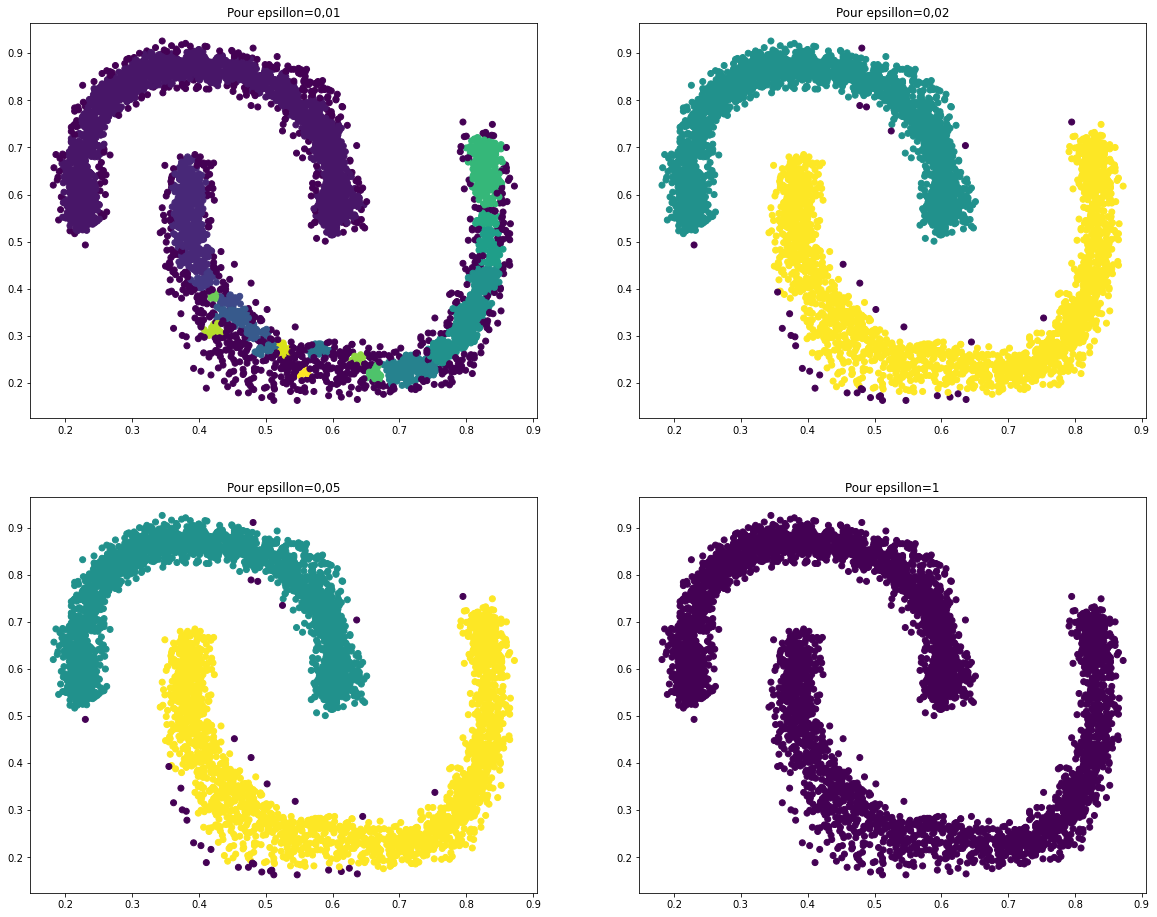

In [104]:
model_3dbscan1= DBSCAN(eps=0.01, min_samples=10)
model_3dbscan1.fit(data3)

model_3dbscan2= DBSCAN(eps=0.02, min_samples=10)
model_3dbscan2.fit(data3)

model_3dbscan3= DBSCAN(eps=0.05, min_samples=10)
model_3dbscan3.fit(data3)

model_3dbscan4= DBSCAN(eps=1, min_samples=10)
model_3dbscan4.fit(data3)

plt.figure(figsize=(20,16))

plt.subplot(2,2,1)

plt.scatter(data3['x'], data3['y'], c=model_3dbscan1.labels_.astype(float))
plt.title("Pour epsillon=0,01")

plt.subplot(2,2,2)
plt.scatter(data3['x'], data3['y'], c=model_3dbscan2.labels_.astype(float))
plt.title("Pour epsillon=0,02")

plt.subplot(2,2,3)
plt.scatter(data3['x'], data3['y'], c=model_3dbscan2.labels_.astype(float))
plt.title("Pour epsillon=0,05")

plt.subplot(2,2,4)
plt.scatter(data3['x'], data3['y'], c=model_3dbscan4.labels_.astype(float))
plt.title("Pour epsillon=1")

plt.show()

<h3>Quatrième Dataset</h3>

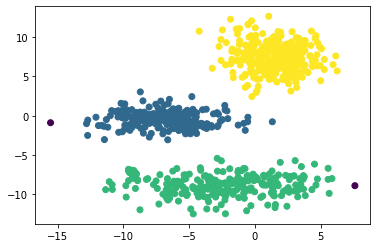

In [102]:
model_4dbscan= DBSCAN(eps=2, min_samples=10)
model_4dbscan.fit(data4)
plt.scatter(data4['x'], data4['y'], c=model_4dbscan.labels_.astype(float))

<U>CONCLUSION:</U> DBSCAN fonctionne à merveille sur les données sphériques mais peine à regrouper les autres. Là où les deux premiers algorithmes s'en sortent plutot mieux. Incapable de gérer des clusters de densités variables.

<h1>Clustering HDBSCAN</h1>

<h3>Premier Dataset</h3>

HDBSCAN est un algorithme qui conserve les concepts et définitions de DBSCAN mais les modifie pour en faire une version hiérarchique qui permet de se passer
du choix du paramètre crucial qu’est Eps qu'on a du mal à trouver.

min_samples = le nombre minimum de voisins d'un point central. Plus il est élevé, plus de points seront rejetés en tant que bruit

min_cluster_size = la taille minimale qu'un cluster final peut avoir. Plus celui-ci est élevé, plus vos clusters seront gros.

In [36]:
model_1hdbscan = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=3) # entrainement intégré
model_1hdbscan.fit(data1) #Si voulu il va encore le refaire

plt.scatter(data1['x'], data1['y'],data1['z'], c=model_1hdbscan.labels_, cmap='rainbow')

C:\Users\mx\miniconda3\envs\mainconda\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


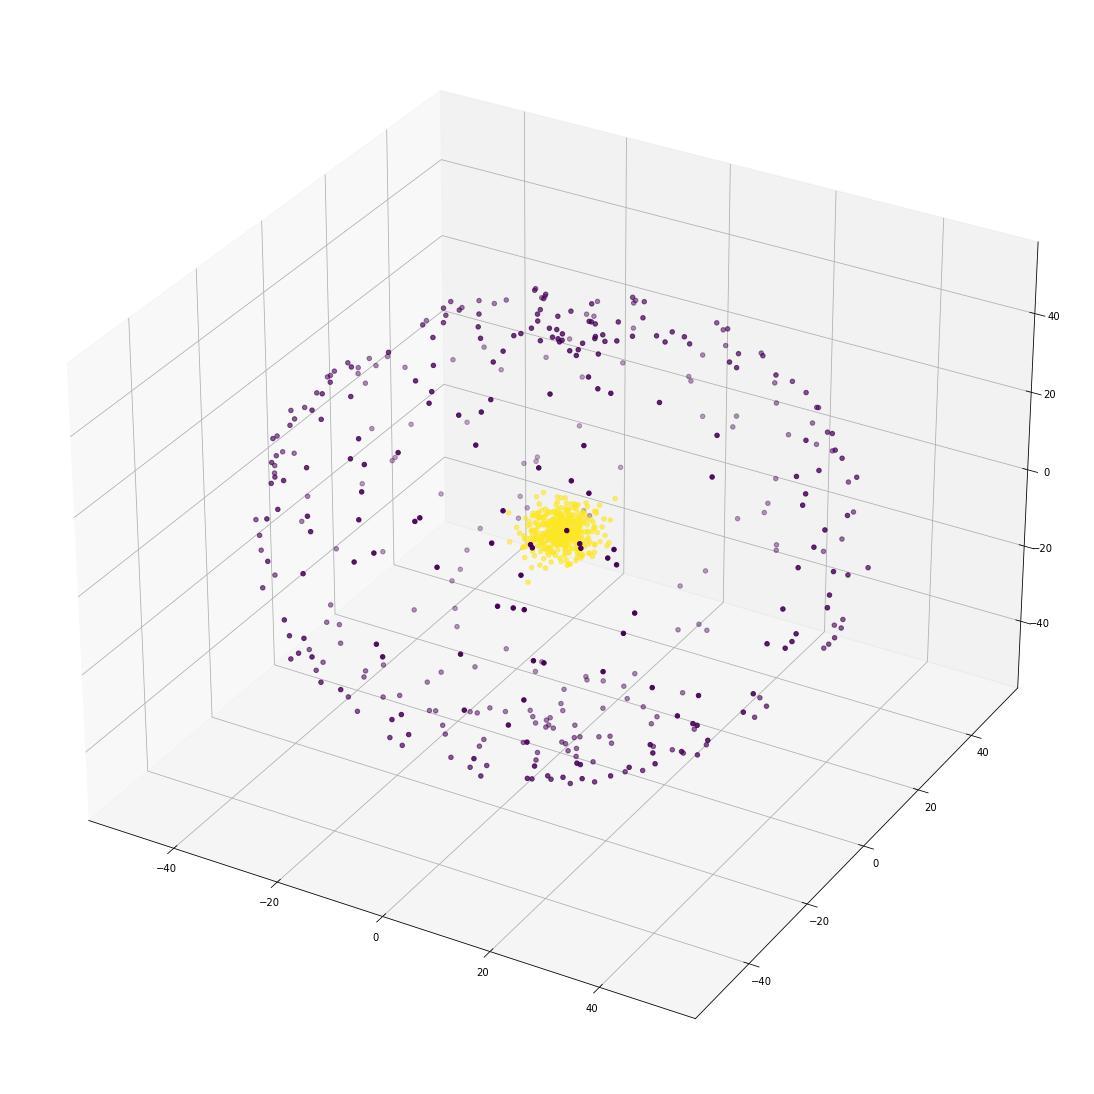

In [37]:
fig = plt.figure(figsize=(15,15))
axes = Axes3D(fig, auto_add_to_figure=False)
#axes = fig.add_axes([0, 0, 1, 1])
fig.add_axes(axes)
axes.scatter(data1.x , data1.y, data1.z,c=model_1hdbscan.labels_)
plt.show()

<h3>Deuxieme Dataset</h3>

In [38]:
model_2hdbscan = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=3) # entrainement intégré
model_2hdbscan.fit(data2)
model_2hdbscan_labels = model_2hdbscan.fit_predict(data2)

plt.scatter(data2['x'], data2['y'], c=model_2hdbscan_labels, cmap='rainbow')

<h3>Troisième Dataset</h3>

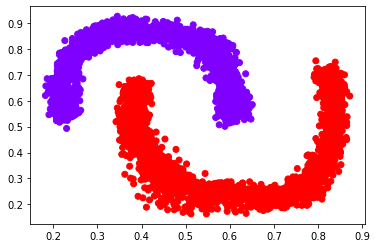

In [39]:
model_3hdbscan = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=3)
model_3hdbscan_labels = model_3hdbscan.fit_predict(data3)

plt.scatter(data3['x'], data3['y'], c=model_3hdbscan_labels, cmap='rainbow')

<h3>Quatrieme Dataset</h3>

In [109]:
model_4hdbscan = hdbscan.HDBSCAN(min_cluster_size=10,min_samples=15)
model_4hdbscan_labels = model_4hdbscan.fit_predict(data4)

plt.scatter(data4['x'], data4['y'], c=model_4hdbscan_labels, cmap='rainbow')

<U>Conclusion:</U> HDBSCAN est une version optimisée de DBCSAN qui est n'est pas sensible au bruit. Elle réussit aussi à donner un rendu satisfaisant sur des données pas forcement sphériques.